In [1]:
#Tabular Playground Series - Jun 2021
#Link Below
#https://www.kaggle.com/competitions/tabular-playground-series-jun-2021

#Lundquist Griffin griffin.lundquist@studio.unibo.it,
#McCallan Oliver, oliver.mccallan@studio.unibo.it
#Mendoza Alberto, alberto.mendozaperea@studio.unibo.it
#Simon Christopher, ronald.simon@studio.unibo.it
#Lanccetti Valerico, valerico.laccetti@studio.unibo.it




import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [46]:
random_state = 42
np.random.seed(random_state) # this sets the random sequence. Setting only this the repeatability is guaranteed
                             # only if we re-execute the entire notebook

cutoff_variance = .8
ts = .01
cv = 5

df_train = pd.read_csv('./train.csv')

print(f'The shape of the training data is {df_train.shape}')

The shape of the training data is (200000, 77)
The shape of the test data is (100000, 76)


In [47]:
# show 10 random records
df_train.sample(10)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
119737,119737,0,0,15,0,0,0,0,0,11,...,0,0,1,0,0,0,1,0,0,Class_3
72272,72272,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,0,0,0,0,Class_6
158154,158154,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_6
65426,65426,6,0,0,0,0,2,0,0,0,...,3,7,2,1,0,0,0,1,1,Class_8
30074,30074,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_1
23677,23677,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
134858,134858,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,Class_9
176418,176418,0,0,0,0,0,14,0,0,0,...,0,0,1,1,1,2,0,0,0,Class_2
132467,132467,0,2,1,3,1,0,0,7,8,...,0,1,0,0,20,18,1,0,1,Class_8
4082,4082,40,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,Class_5


In [48]:
# number of unique values
df_train.nunique().sort_values(ascending=False)[:30]

id            200000
feature_15       105
feature_60        99
feature_59        92
feature_73        91
feature_46        87
feature_28        78
feature_32        77
feature_54        72
feature_61        70
feature_63        70
feature_19        66
feature_55        65
feature_47        63
feature_62        61
feature_3         59
feature_29        58
feature_67        57
feature_41        56
feature_22        55
feature_5         55
feature_43        53
feature_69        52
feature_9         51
feature_24        50
feature_74        50
feature_70        49
feature_27        49
feature_51        49
feature_2         48
dtype: int64

In [49]:
target_lbl = 'target'
classes = df_train[target_lbl].unique()
classes.sort()

print(classes)

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']


In [50]:
# create X_full
le = LabelEncoder()
y = le.fit_transform(df_train[target_lbl])
X_full = df_train.drop([target_lbl, 'id'], axis=1)

In [51]:
# show X_full
X_full.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
model_lbls = ['dt' # decision tree
             #,'nb' # gaussian naive bayes
             ,'rf'   # random forest
             #,'lp'   # linear perceptron
             #,'svc'  # support vector
             #,'knn'  # k nearest neighbours
             #,'adb'  # adaboost
            ]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-12,-1)]}]
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state),
           'param': [{'kernel': ['rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],
                    },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[20,30,40,50]
                     ,'learning_rate':[0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{
                      # 'max_depth': [*range(4,30)]
                      'max_depth': [*range(4,30,4)]
                    #  ,'n_estimators':[*range(20,80,5)]
                     ,'n_estimators':[*range(10,30,5)]
                     ,'class_weight': [None,'balanced']
                      }]
          }

}


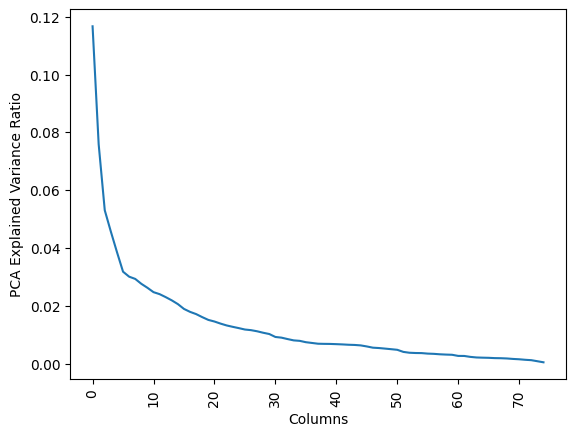

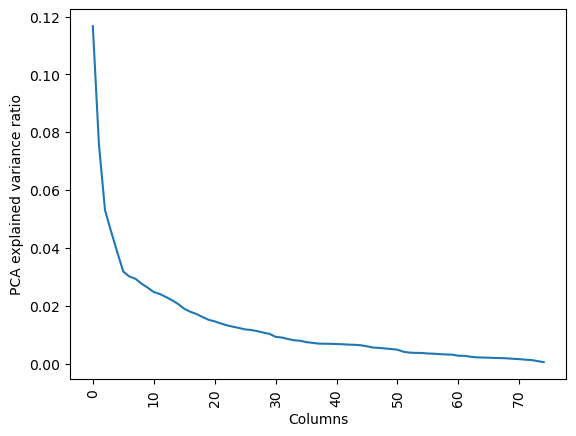

In [53]:
pca_model = PCA()

X_trans = pca_model.fit_transform(X_full)

plt.plot(range(X_full.shape[1]), pca_model.explained_variance_ratio_)
plt.ylabel('PCA explained variance ratio')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

In [54]:
# Sort the explained variance ratios in descending order
explained_variances = pca_model.explained_variance_ratio_
sorted_variances = sorted(explained_variances, reverse=True)

# Calculate the cumulative sum of the explained variance ratios
cumulative_variances = np.cumsum(sorted_variances)

# Find the index i of the first principal component where the cumulative sum exceeds the threshold
cutoff_index = np.argmax(cumulative_variances > cutoff_variance)

# Keep the first i principal components and discard the rest
# Dimensionality reduction
# X is projected on the first principal components previously extracted from a training set.
X = pca_model.transform(X_full)[:, :cutoff_index+1]


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ts, random_state=random_state)

print(f'There are {X_train.shape[0]} samples in the training dataset')
print(f'There are {X_test.shape[0]} samples in the testing dataset')
print(f'Each sample has {X_train.shape[1]} features')

There are 2000 samples in the training dataset
There are 198000 samples in the testing dataset
Each sample has 31 features


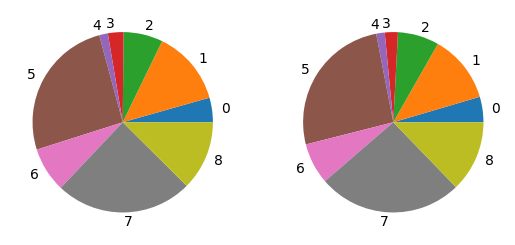

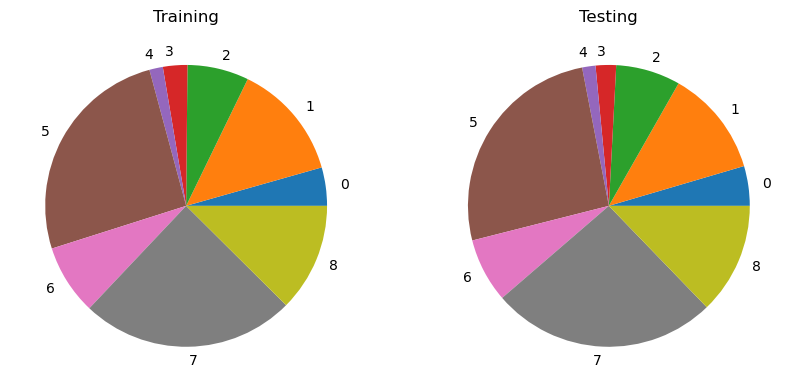

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(np.unique(y_train, return_counts=True)[1], labels=np.unique(y_train, return_counts=True)[0])
ax1.set_title('Training')
ax2.pie(np.unique(y_test, return_counts=True)[1], labels=np.unique(y_test, return_counts=True)[0])
ax2.set_title('Testing')
plt.show()


In [58]:
scorings = ['accuracy'
            # ,'precision_macro'
            # ,'recall_macro'
            ,'f1_macro'
            ]

{'dt': 38, 'rf': 56}

In [60]:
from sklearn.model_selection import ParameterGrid

# get the number of the parameters combinations for each model
params = { lbl: len(list(ParameterGrid(models[lbl]['param']))) for lbl in model_lbls }
params

{'dt': 38, 'rf': 56}

In [61]:
clfs = []
results = pd.DataFrame(columns=['scoring', 'model','best_params','accuracy','precision_macro','recall_macro','f1_macro'])

In [63]:
#grid search cv
for scoring in scorings:
    for m in model_lbls:
        clf = GridSearchCV(estimator=models[m]['estimator'], param_grid=models[m]['param'], scoring=scoring, cv=cv)

        clf.fit(X_train, y_train)
        clfs.append(clf)

        y_pred = clf.predict(X_test)

        cr = classification_report(y_test, y_pred, output_dict=True)
        results.loc[len(results)] = [
            scoring,
            models[m]['name'],
            clf.best_params_,
            cr['accuracy'],
            cr['macro avg']['precision'],
            cr['macro avg']['recall'],
            cr['macro avg']['f1-score']
        ]

,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
1,Random forest,"{'class_weight': None, 'max_depth': 4, 'n_estimators': 25}",0.327,0.679,0.163,0.130
0,Decision Tree,"{'class_weight': None, 'max_depth': 3}",0.307,0.682,0.148,0.126


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
3,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 25}",0.264,0.155,0.163,0.157
2,Decision Tree,"{'class_weight': None, 'max_depth': 7}",0.283,0.149,0.148,0.133


In [69]:
for scoring in scorings:
    display(results[results['scoring'] == scoring]
            .sort_values(by='f1_macro', ascending=False)
            .drop('scoring', axis=1)
            .style
            .format(precision=3)
            .set_caption(f'Results for {scoring}'))

,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
1,Random forest,"{'class_weight': None, 'max_depth': 4, 'n_estimators': 25}",0.327,0.124,0.163,0.130
0,Decision Tree,"{'class_weight': None, 'max_depth': 3}",0.307,0.127,0.148,0.126


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
3,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 25}",0.264,0.155,0.163,0.156
2,Decision Tree,"{'class_weight': None, 'max_depth': 7}",0.283,0.149,0.148,0.133


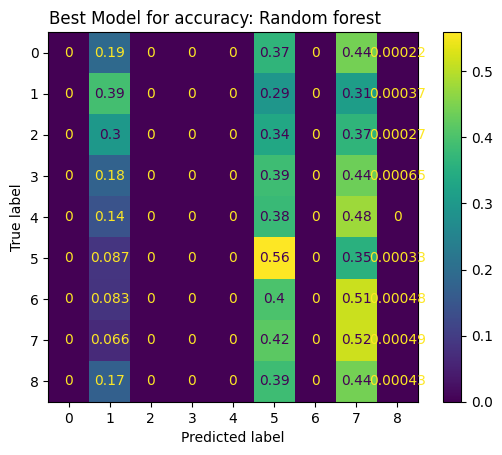

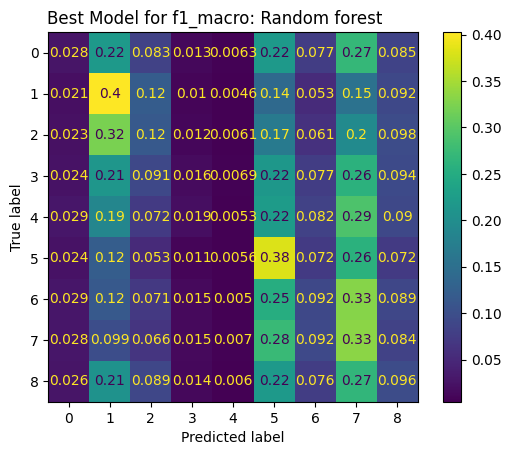

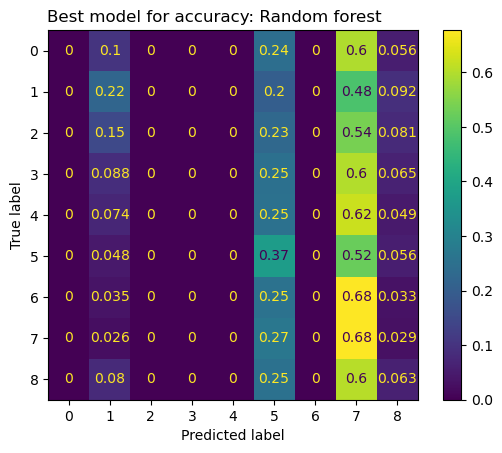

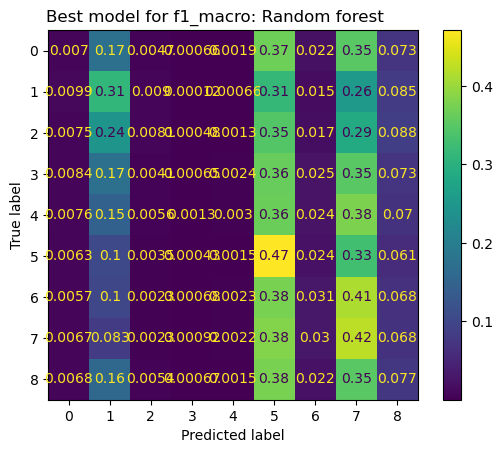

In [73]:
for scoring in scorings:
    best_row = results.loc[results['scoring'] == scoring, scoring].idxmax(axis=0)
    cm = ConfusionMatrixDisplay.from_estimator(
        estimator=clfs[best_row],
        X=X_test,
        y=y_test,
        normalize='true'
    )
    cm.ax_.set_title(f'Best model for {scoring}: {results.at[best_row, "model"]}')

plt.show()

In [77]:
# final test with best model trained on all (train) data
df_test = pd.read_csv('./test.csv').drop('id', axis=1)

df_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,0,1,7,1,0,0,0,0,6,0,...,3,0,0,0,0,3,0,2,0,0
3,0,0,0,4,3,1,0,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,0,0,5,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,1,0


In [81]:
# only consider the most meaningful features
# using the same cutoff index as in the training data
X_cut_test = pca_model.transform(df_test)[:, :cutoff_index + 1]
y_test_pred = clfs[best_row].predict(X_cut_test)

y_test_pred = clf.best_estimator_.predict(X_test)
print(y_test_pred.shape)

(198000,)


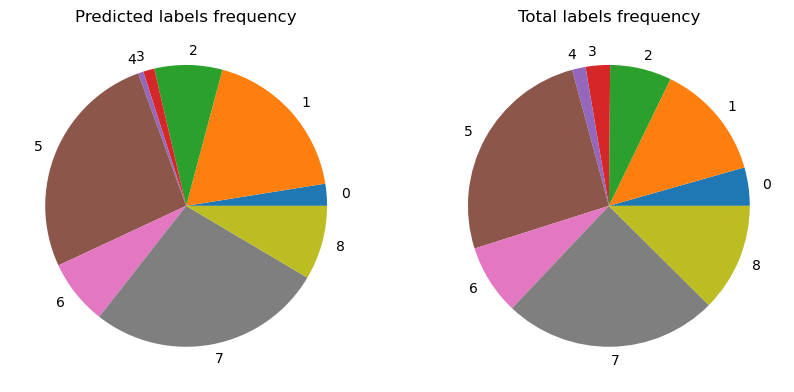

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(
    np.unique(y_test_pred, return_counts=True)[1],
    labels=np.unique(y_test_pred, return_counts=True)[0])
ax1.set_title('Predicted labels frequency')
ax2.pie(
    np.unique(y_train, return_counts=True)[1],
    labels=np.unique(y_train, return_counts=True)[0])
ax2.set_title('Total labels frequency')
plt.show()